<a href="https://colab.research.google.com/github/Gulshat5510/DeepHeart/blob/AI/Cardiovascular_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/cardio_train.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [42]:
df = pd.read_csv('/content/drive/MyDrive/cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [43]:
df['age']=df['age']//365




In [5]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [27]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003814,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003814,1.000000,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,0.098388,-0.047649,-0.029756,-0.009998,0.237985
gender,0.003502,-0.022913,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081506,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053561,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020854,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017620,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154012,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098388,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047649,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


In [6]:
df.corr()['cardio'].sort_values(ascending=False)

cardio         1.000000
age            0.237985
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
id             0.003799
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64

In [44]:
target_y = 'cardio'
X_cols = list(df.columns)
X_cols.remove(target_y)
X_cols.remove('id')

In [45]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.3, random_state=0)
y_train = train_data[target_y]
X_train = train_data[X_cols]
y_test = test_data[target_y]
X_test = test_data[X_cols]



XGBOOSt


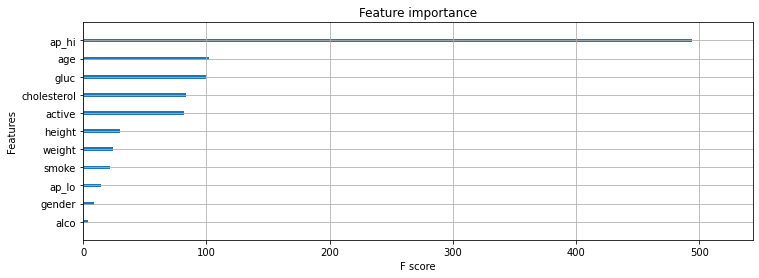

In [14]:
from matplotlib import pyplot as plt

_, ax = plt.subplots(figsize=(12, 4))
xgb.plot_importance(gbm,
                    ax=ax,
                    importance_type='gain',
                    show_values=False)
plt.show()

Decision Tree


In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#X_train.reshape(-1, 1)
#X_test.reshape(-1, 1)

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0, max_depth=11)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix(y_test, y_pred_test))
acc = accuracy_score(y_train, y_pred_train)
print("Accuracy : ", acc)
acc = accuracy_score(y_test, y_pred_test)
print("Accuracy : ", acc)


[[19681  4801]
 [ 6992 17526]]
[[8152 2387]
 [3364 7097]]
Accuracy :  0.7593265306122449
Accuracy :  0.7261428571428571


In [12]:
import joblib
joblib.dump(model, 'cardio_decision_tree(-1,1).pkl')

['cardio_decision_tree(-1,1).pkl']

In [18]:
knn_from_joblib = joblib.load('/content/drive/MyDrive/cardio_decision_tree.pkl')

Random Forest


In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/drive/MyDrive/cardio_train.csv', sep = r';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
# Appearing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
# Statistic Overview
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


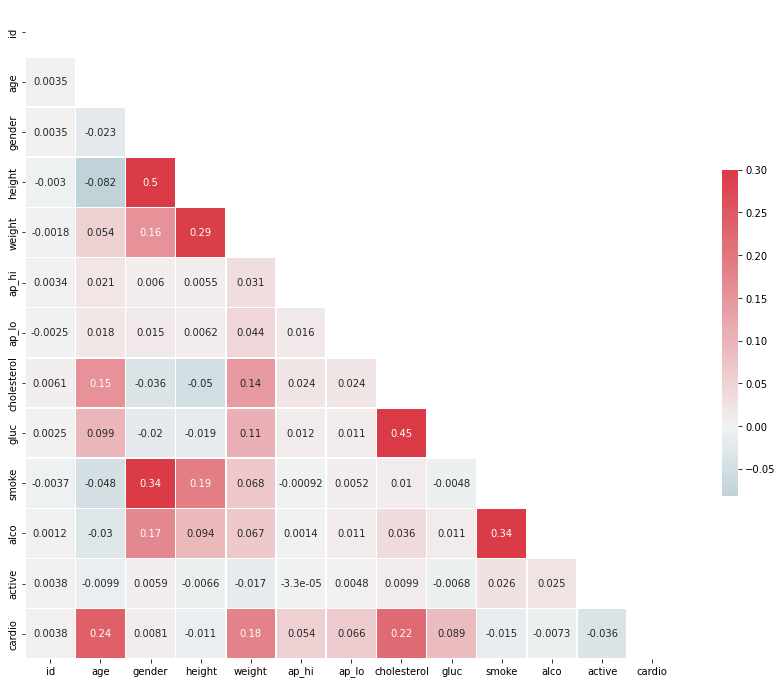

In [ ]:
# Multivariate Analysis & Correlation Detection
import seaborn as sb
correl = df.corr()
cmap = sb.diverging_palette(220, 10, as_cmap = True)

mask = np.zeros_like(correl, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (16, 12))

sb.heatmap(correl, mask = mask, cmap = cmap, vmax = 0.3, center = 0,annot = True, square = True, linewidths = 0.5, cbar_kws = {"shrink": .5});


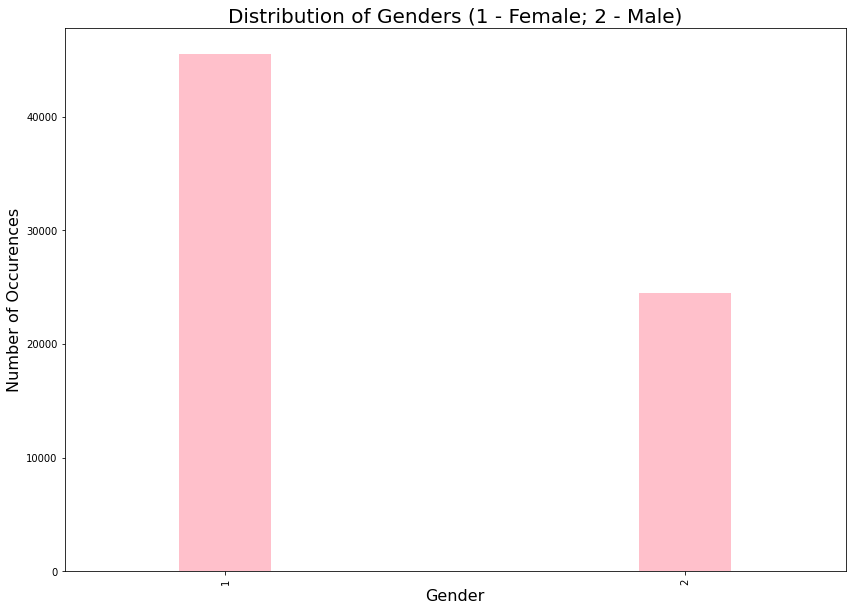

In [ ]:
# Gender Distribution
fig, ax = plt.subplots(figsize = (14, 10))
ax.set_title('Distribution of Genders (1 - Female; 2 - Male)', fontsize = 20)
ax.set_xlabel("Gender", fontsize = 16)
ax.set_ylabel("Number of Occurences", fontsize = 16)
df["gender"].value_counts().plot(ax = ax, kind = "bar", color = "pink", width=0.2)

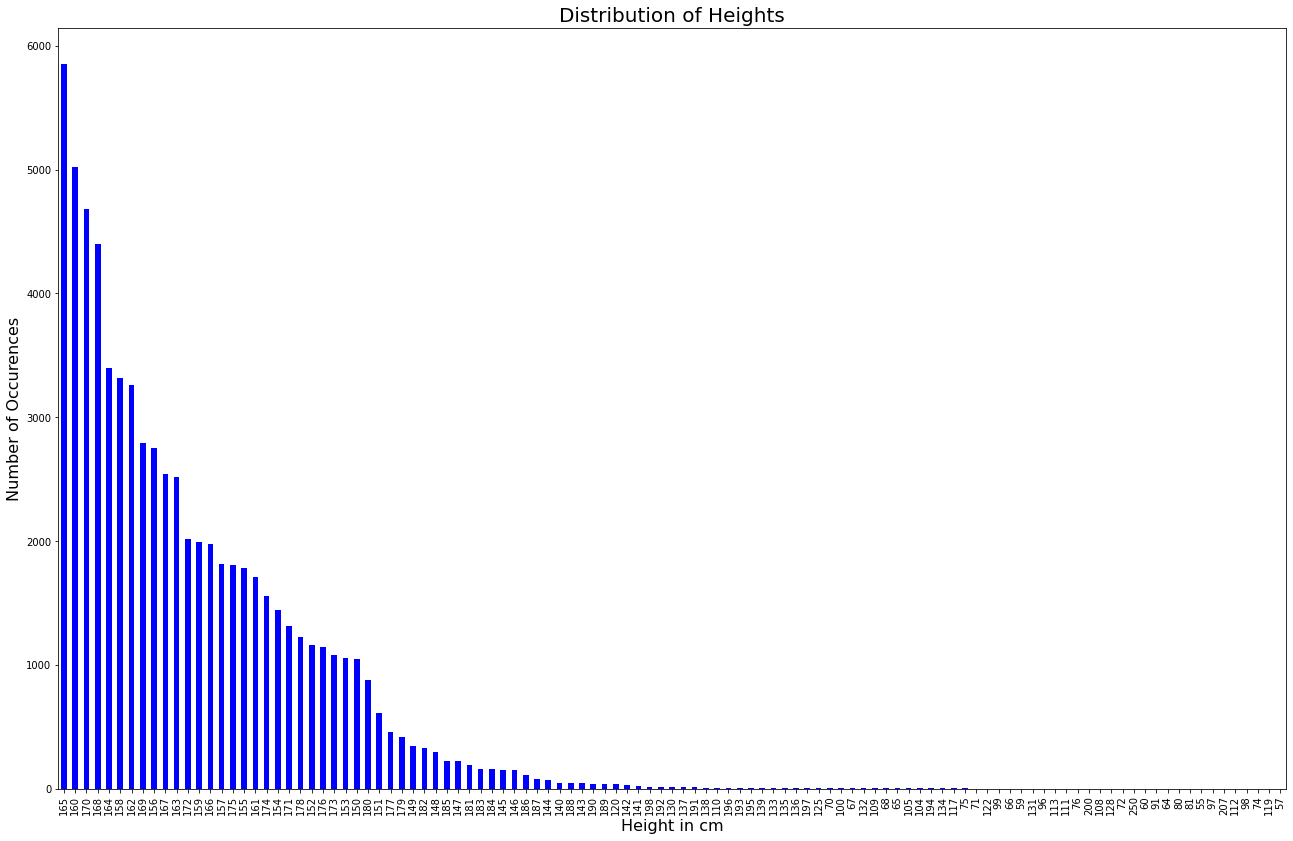

In [ ]:
# Height Distribution (Ordered)
fig, ax = plt.subplots(figsize = (22, 14))
ax.set_title('Distribution of Heights', fontsize = 20)
ax.set_xlabel("Height in cm", fontsize = 16)
ax.set_ylabel("Number of Occurences", fontsize = 16)
df["height"].value_counts().plot(ax = ax, kind = "bar", color = "blue")

In [53]:
num = df["smoke"].value_counts()
num

0    63831
1     6169
Name: smoke, dtype: int64

In [54]:
num_ns = 70000 * 0.911871
num_s = 70000 * 0.088129

print("There are " + str(num_ns) + " Non-Smokers and " + str(num_s) + " Smokers in the data set.")

There are 63830.97 Non-Smokers and 6169.03 Smokers in the data set.


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(["smoke"], axis = 1).values
y = df["smoke"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

Gaussian Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

Method 2: Logistic Regression

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
X_train

array([[ 1.3504649 , -0.73465533,  0.81166962, ..., -0.31236501,
        -0.23953913,  0.49470087],
       [-1.61155817,  1.36118253,  1.05637254, ...,  3.20138285,
        -0.23953913, -2.02142356],
       [ 1.3504649 ,  1.36118253,  0.32226377, ..., -0.31236501,
        -0.23953913,  0.49470087],
       ...,
       [ 1.20236375,  1.36118253,  1.17872401, ..., -0.31236501,
        -0.23953913,  0.49470087],
       [-0.42674894, -0.73465533, -1.39065672, ..., -0.31236501,
        -0.23953913,  0.49470087],
       [ 0.31375683,  1.36118253,  0.56696669, ..., -0.31236501,
        -0.23953913,  0.49470087]])

111.93954610991669

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 10))
plt.scatter(X_train[:,1], X_train[:,4], c = y_train)
plt.xlabel("Age")
plt.ylabel("Weight")
plt.legend(["Smokers", "Non-Smokers"], loc = "best")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

Method 3: Decision Tree¶


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

Method 4: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion = "entropy")
model.fit(X_train, y_train)

model.score(X_test, y_test)

Method 5: K-Nearest-Neighbor Algorithm (KNN)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

In [55]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(11,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='tanh'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [56]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [59]:
from keras import losses
from tensorflow.keras import optimizers
from keras import metrics
model.compile(optimizer=optimizers.RMSprop()),
loss=losses.mse,
metrics=[metrics.binary_accuracy]

In [60]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
77/77 [==============================] - 2s 12ms/step - loss: 0.6260 - acc: 0.6484 - val_loss: 0.6410 - val_acc: 0.6318
Epoch 2/20
77/77 [==============================] - 0s 5ms/step - loss: 0.6260 - acc: 0.6469 - val_loss: 0.6268 - val_acc: 0.6459
Epoch 3/20
77/77 [==============================] - 0s 5ms/step - loss: 0.6257 - acc: 0.6483 - val_loss: 0.6272 - val_acc: 0.6441
Epoch 4/20
77/77 [==============================] - 0s 4ms/step - loss: 0.6253 - acc: 0.6496 - val_loss: 0.6428 - val_acc: 0.6332
Epoch 5/20
77/77 [==============================] - 0s 5ms/step - loss: 0.6247 - acc: 0.6486 - val_loss: 0.6255 - val_acc: 0.6466
Epoch 6/20
77/77 [==============================] - 0s 5ms/step - loss: 0.6244 - acc: 0.6502 - val_loss: 0.6419 - val_acc: 0.6316
Epoch 7/20
77/77 [==============================] - 0s 4ms/step - loss: 0.6247 - acc: 0.6488 - val_loss: 0.6275 - val_acc: 0.6430
Epoch 8/20
77/77 [==============================] - 0s 4ms/step - loss: 0.6245 - acc: 0.6

In [61]:
model.predict(X_test)

array([[0.21333331],
       [0.3407362 ],
       [0.45040548],
       ...,
       [0.376021  ],
       [0.6096009 ],
       [0.19572052]], dtype=float32)